In [34]:
import os  # it is used for easily navigating through files
import tensorflow as tf
import pandas as pd
import numpy as np

## DATA LOADING

In [35]:
np.expand_dims # it helps to wrap up any of information inside another set of arrays
# it is used when  you have got one sample in your batch and you want to pass it to deep learning model coz it is expecting multiple example     

<function numpy.expand_dims(a, axis)>

In [36]:
os.path.join('comment-toxicity-dataset','train.csv') # getting the training data

'comment-toxicity-dataset\\train.csv'

In [37]:
df=pd.read_csv(os.path.join('comment-toxicity-dataset','train.csv')) # reading the training data

In [38]:
df.head()  # reading first 5 lines

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [39]:
df.iloc[0]['comment_text']  # reading the 0th row and commnet_text column

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [40]:
df[df.columns[2:]].iloc[3] # it is giving the toxicity of 3rd row comment

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

## DATA PREPROCESSING

In [41]:

# now we have got the data.. now we need to preprocess it so that it can be ready for modelling 
# preprocessing involves tokenizing it(means translating it into our own secret language that deep learning model understand)
# and also splitting data into train,validation and testing

In [42]:
from tensorflow.keras.layers import TextVectorization #  it makes tokenization so easy 

In [43]:
# textvectorization  is a preprocessinglayer which maps text feature to integer sequence 

In [44]:
#SPILITING OUR DATA INTO COMMENT AND FEATURES

In [45]:
X=df['comment_text'] # keeping just the comment
Y=df[df.columns[2:]].values # keeping the record of toxicity of each comment

In [46]:
Y # 0 represents not and 1 represents yes

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [47]:
MAX_FEATURES=200000 #number of words in vocab.. more the number more chances of good accuracy of model

In [48]:
# INITIALISING OUR TEXT VECTORIZATION MODEL
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')
# ouptut sequence length basically is the capping that we did to 1800 in this case means that we will take just fist 1800 words of particular comment


In [49]:
# now teching our vectorizaer vocabulary 
vectorizer.adapt(X.values) # it is going to learn allthe words inside our vocabulary that is the words that are inside our sentences 
# x.values is a numpy array

In [50]:
vectorizer.get_vocabulary() 

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [51]:
vectorizer('hello,life is great') # it will assign them tokenized integer 

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  1,   9, 275, ...,   0,   0,   0], dtype=int64)>

In [52]:
vectorized_text=vectorizer(X.values)  # it will assing the values to each word

In [53]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [54]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,Y)) # loading the data with input as vectorized text and output ad y
dataset=dataset.cache()  # 
dataset=dataset.shuffle(160000) # maximum size of dataset and shuffles it
dataset=dataset.batch(16)       #it will be trained in batches with each batch size of 16 smaples
dataset=dataset.prefetch(8)    #helps prevent bottlenecks


In [55]:
batch_X,batch_y=dataset.as_numpy_iterator().next()  # it will give the one batch of 16 size as declared earlier
batch_X.shape

(16, 1800)

In [56]:
# now we will do the training, validationa nd testing partition

In [57]:
len(dataset) # here 9974 are bathes not samples..

9974

In [58]:
train=dataset.take(int(len(dataset)*.7)) # taking 70% of data as testing data
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))  # skipping the training set and picking the next 20%
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) 

In [59]:
# so now train.as_numpy_iterator() will generate the training batches and as we put next() it will generete different batches

In [60]:
train_generator=train.as_numpy_iterator()
train_generator.next()

(array([[ 757, 4324,  485, ...,    0,    0,    0],
        [  12,    9,    6, ...,    0,    0,    0],
        [6723, 1169,  492, ...,    0,    0,    0],
        ...,
        [  77,  301,   31, ...,    0,    0,    0],
        [ 915,  123,    2, ...,    0,    0,    0],
        [   8,  253,   22, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

## CREATING DEEP LEARNING MODEL

In [61]:
from tensorflow.keras.models import Sequential  # importing sequential api. it is fastest and easiest
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense, Embedding# they all are the layers we will use to build our model

In [62]:
# we will start off with the lstm layer so our bidirectional layer is going to be a modifier on top of that and its going to allow us to pass  the features or values from
# lstm outputs across the board as we are passing through our sequences  
# dropout is method of regularization
# dense layer is our fully connected layer 
# embedding layer converts the  almost like personality test per word and is learned as we go and train our deep neural network 

In [63]:
model=Sequential() # creating model
# create the embedding layer
model.add(Embedding(MAX_FEATURES+1,32)) # we added +1 to make sure the layer dimension matches and 32 is ho long the length is 
#bidirectional lstm layer
model.add(Bidirectional(LSTM(32,activation='tanh'))) # here 32 is units in lstm layer and over it biderctional  as it allows u to pass information in both direction
# and it is particularly useful in sentences as words prior to curent word will still have meaning

# 3 dense layer with units 128,256,128 respectively (feature extractor fully connected layer )
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

# (final layer) and last 4h dense layer with units 6(same as number of feature (output layer)) with activation function sigmoid 
model.add(Dense(6,activation='sigmoid')) # sigmmoid is taken because it gives value between 0 and 1

In [64]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [65]:
model.summary() # summary of what we did in our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [66]:
history=model.fit(train,epochs=3,validation_data=val)  # training our model

Epoch 1/3
6981/6981 [==============================] - 9800s 1s/step - loss: 0.0618 - val_loss: 0.0456
Epoch 2/3
6981/6981 [==============================] - 9607s 1s/step - loss: 0.0454 - val_loss: 0.0396
Epoch 3/3
6981/6981 [==============================] - 9618s 1s/step - loss: 0.0401 - val_loss: 0.0353


In [67]:
history.history   #loss matrix

{'loss': [0.061795979738235474, 0.045424748212099075, 0.04007101431488991],
 'val_loss': [0.04558182880282402, 0.03956122323870659, 0.03528313338756561]}

In [68]:
from matplotlib import pyplot as plt


<Figure size 800x500 with 0 Axes>

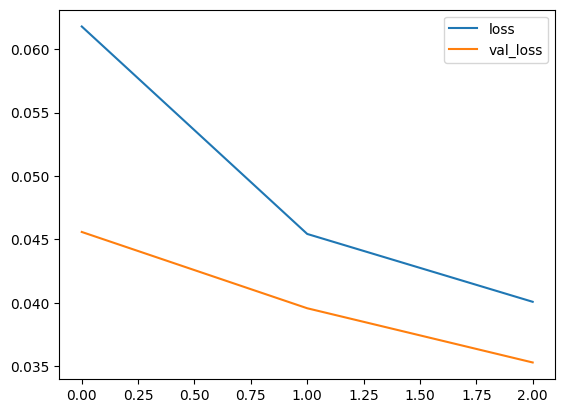

In [69]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## MAKING PREDICTIONS

In [70]:
batch=test.as_numpy_iterator().next()
batch

(array([[  36,  158,    8, ...,    0,    0,    0],
        [   8,   55,   72, ...,    0,    0,    0],
        [   7,   19,   58, ...,    0,    0,    0],
        ...,
        [ 202,   41,  343, ...,    0,    0,    0],
        [  60, 1002,    4, ...,    0,    0,    0],
        [1818,  979,  204, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [71]:
input_text=vectorizer('you freaking suck!')

# if we directly predict it.. it will throw error because our model is expecting data in batches


In [72]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 2s 2s/step


array([[0.9994277 , 0.24327114, 0.9834766 , 0.0102992 , 0.9176606 ,
        0.06854074]], dtype=float32)

In [80]:
batch_x,batch_y=test.as_numpy_iterator().next() # checking on testing data

In [81]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [82]:
(model.predict(batch_x)>0.5).astype(int)

1/1 [==============================] - 1s 562ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

## EVALUATING OUR MODEL

In [76]:
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [77]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()
# the advantage of this is it allow you to add results over time u can get an aggregate metric over time.. as we have data in batches..
# so it allows us to perform this task without unbatching the data

In [78]:
for batches in test.as_numpy_iterator():
    # going batch by batch
    X_true,Y_true=batch
    yhat=model.predict(X_true)   # yhat is predicted output on x_true in batches
    
    # now we will flatten it.. in flatten the whole output is transfered to one monster array
    Y_true=Y_true.flatten()
    yhat=yhat.flatten()
    
    pre.update_state(Y_true,yhat)
    re.update_state(Y_true,yhat)
    acc.update_state(Y_true,yhat)
    
    

1/1 [==============================] - 0s 216ms/step


In [79]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.5, Recall:1.0,Accuracy:1.0


## TEST AND GRADIO


In [83]:
# gradio is the platform where we can deplo our machine ng proecwith the help of our python code

In [84]:
import gradio as gr

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
# saving our model
model.save('toxicity.h5')  # h5 is file format use to store large amount of data

In [89]:
model=tf.keras.models.load_model('toxicity.h5')

In [105]:
# testing our model
input_str=vectorizer('hey i freaken hate you')

In [106]:
res=model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 335ms/step


In [107]:
res  # it will give the prediction of the type of comment it is 

array([[0.863348  , 0.02021515, 0.1381461 , 0.0988676 , 0.4427786 ,
        0.18680228]], dtype=float32)

In [94]:
# so now what we are going to do is to implement a function that we're going to hook into our gradio model 

In [108]:
def score_comment(comment):  # function will get a comment as arguement
    vectorized_comment=vectorizer([comment])  # comment will be passed through vectorizer
    results=model.predict(vectorized_comment) # it will be predicted and stored in result
    
    # now we will print the type of particular comment 
    text=''
    for idx,col in enumerate(df.columns[2:]):
        text+='{}:{}\n'.format(col,results[0][idx]>0.5)
    
    return text    

In [109]:
interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='Comment to score'),outputs='text')

C:\Users\Dell\AppData\Local\Temp\ipykernel_5964\1733869030.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='Comment to score'),outputs='text')
C:\Users\Dell\AppData\Local\Temp\ipykernel_5964\1733869030.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='Comment to score'),outputs='text')
C:\Users\Dell\AppData\Local\Temp\ipykernel_5964\1733869030.py:1: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='Comment to score'),outputs='text')


1/1 [==============================] - 0s 136ms/step


In [110]:
interface.launch(share=True)  # share = true makes it publicly available

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://3c4b4a848d7a41e449.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 1s 570ms/step
